In [8]:
import sys
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, models
from torchvision.transforms import v2
from omegaconf import DictConfig
import matplotlib.pyplot as plt
from Transforms import Transforms

In [2]:
from pathlib import Path
# include ../../3_Datapreparation
project_dir = Path(os.getcwd()).resolve().parent
sys.path.append(str(project_dir / '1_HaGRID'))
from dataset import ClassificationDataset, DetectionDataset, HagridDataset
import constants

In [3]:
config = {
    "dataset": {
        "targets": ["fist", "three3"],
        "annotations_test": "./../Data/test",
        "dataset_test": "./../Data/data",
        "subset": None,
        "one_class": True,
    }
}

# Convert config to DictConfig
conf = DictConfig(config)

In [9]:
#dataset = HagridDataset(conf=conf, dataset_type="test", transform=None)
crop_transform = Transforms.CropToBBox()
datasetBBox = DetectionDataset(conf=conf, dataset_type="test", transform=crop_transform)
datasetTarget = ClassificationDataset(conf=conf, dataset_type="test", transform=None)

Prepare test dataset: 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]


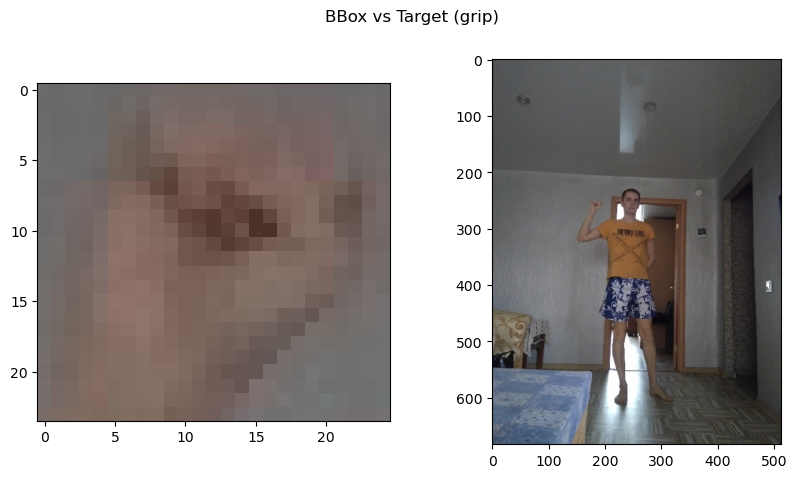

In [25]:
image_index = 300
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# print title wit the target
fig.suptitle(f"BBox vs Target ({constants.targets.get(datasetBBox[image_index][1]['labels'][0].item(), 'Unknown')})")
ax1.imshow(datasetBBox[image_index][0])

ax2.imshow(datasetTarget[image_index][0])
plt.show()
